In [10]:
x = list()

for i in range(1, 7):
    for j in range(1, 7):
        x.append(abs(i-j))
        
Sx = set(x)
Sx

{0, 1, 2, 3, 4, 5}

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import random

x = list()
for p in range(600):
    i = random.randint(1, 6)
    j = random.randint(1, 6)
    x.append([i, j, abs(i-j)])

Sx = list()
for i in x:
    Sx.append(i[2])
    
print(Sx)


[1, 3, 1, 1, 2, 1, 0, 0, 3, 2, 0, 0, 3, 3, 3, 2, 1, 3, 3, 1, 4, 3, 0, 0, 2, 1, 1, 3, 2, 4, 2, 0, 3, 1, 3, 3, 0, 3, 3, 3, 0, 1, 3, 5, 0, 0, 1, 1, 3, 3, 5, 1, 1, 0, 4, 1, 1, 2, 0, 2, 0, 3, 4, 5, 5, 2, 1, 2, 4, 2, 1, 0, 0, 4, 5, 0, 2, 4, 3, 1, 4, 2, 0, 2, 2, 2, 2, 3, 2, 4, 1, 3, 1, 1, 4, 1, 0, 2, 2, 2, 4, 3, 2, 0, 2, 3, 3, 3, 2, 1, 4, 2, 1, 4, 0, 4, 3, 1, 1, 3, 4, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 5, 3, 3, 4, 1, 0, 1, 1, 1, 4, 1, 2, 4, 2, 2, 3, 4, 1, 2, 2, 2, 3, 2, 5, 3, 5, 0, 1, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1, 4, 3, 4, 2, 0, 3, 3, 1, 1, 0, 2, 4, 1, 3, 3, 2, 3, 2, 3, 2, 2, 2, 1, 0, 4, 5, 4, 1, 1, 2, 2, 0, 2, 4, 2, 3, 2, 3, 1, 4, 1, 0, 0, 3, 2, 1, 3, 2, 2, 0, 3, 2, 1, 3, 1, 0, 2, 0, 4, 2, 4, 0, 0, 3, 3, 1, 3, 3, 0, 0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 0, 3, 3, 4, 1, 3, 3, 2, 2, 0, 4, 0, 4, 5, 3, 3, 1, 2, 0, 2, 2, 2, 4, 3, 3, 4, 4, 2, 0, 0, 2, 2, 3, 2, 0, 4, 3, 4, 0, 3, 0, 3, 0, 1, 1, 0, 0, 1, 2, 2, 4, 3, 3, 1, 0, 5, 2, 0, 1, 2, 2, 1, 2, 3, 5, 4, 3, 2, 4, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 4, 1, 

In [57]:
%precision 2 # 소수점 3자리까지 계산

'%.2f'

In [39]:
x = np.arange(0, 6)
y = np.array([1/6,5/18,2/9,1/6,1/9,1/18])
print(x,y)

[0 1 2 3 4 5] [0.16666667 0.27777778 0.22222222 0.16666667 0.11111111 0.05555556]


## 확률변수

- 상태공간

In [40]:
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]

x = list()
for i in d1:
    for j in d2:
        x.append(abs(i-j))
x_set = np.array(list(set(x)))
x_set

array([0, 1, 2, 3, 4, 5])

 - 확률질량함수

In [41]:
def f(x):
    cnt = 0
    for i in d1:
        for j in d2:
            if (abs(i-j) == x):
                cnt += 1
    return cnt / (len(d1)*len(d2))

In [42]:
f(2)

0.22

In [43]:
X = [x_set, f]

- 확률변수에 대한 확률

In [44]:
prob = [f(x) for x in x_set]
prob

[0.17, 0.28, 0.22, 0.17, 0.11, 0.06]

In [58]:
dict(zip(x_set, np.round(prob,3)))

{0: 0.167, 1: 0.278, 2: 0.222, 3: 0.167, 4: 0.111, 5: 0.056}

In [60]:
np.sum(prob)

1.0

In [151]:
import math
math.fsum(prob)

0.00

- 기대값

In [152]:
np.sum([ x * f(x) for x in x_set ])

3.75

- 그래프로 나타내기

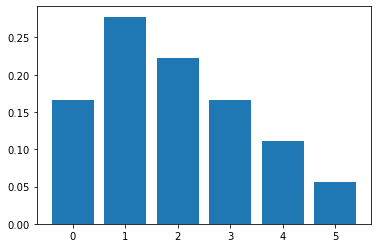

In [65]:
plt.bar(x_set,prob)
plt.show()

- (누적)분포함수

In [68]:
def F(x):
    np.sum([f(x_2) for x_2 in x_set if x_2 <= x]) 

In [75]:
#def F(x):
#    a = 0
#    for x_2 in x_set:
#        if x_2 <= x:
#            a += x_2
#    return a

In [76]:
F(1)

1

## 연속확률변수

## 예제: 20세 이상 남성 키 데이터 그래프로 표현하기

- 데이터 출처: https://sizekorea.kr/ 신체치수데이터

In [77]:
import pandas as pd

In [87]:
data = pd.read_csv('data/키_데이터.csv', encoding='UTF-8')
data

,성별,나이,키
0,남,25,1736.0
1,남,28,1833.0
2,남,19,1744.0
3,남,20,1751.0
4,남,22,1851.0
...,...,...,...
6415,여,20,1706.0
6416,여,20,1624.0
6417,여,44,1508.0
6418,여,20,1574.0


In [90]:
df = pd.DataFrame(data)
df = df.query("성별=='남' and 나이 >= 20 and 나이 < 30")
df['키'] = df['키'] // 10
df

,성별,나이,키
0,남,25,173.0
1,남,28,183.0
3,남,20,175.0
4,남,22,185.0
5,남,23,178.0
...,...,...,...
4853,남,25,168.0
4856,남,29,174.0
4857,남,25,173.0
4867,남,24,168.0


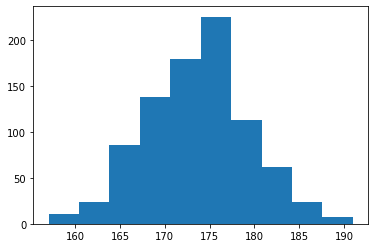

In [118]:
height = set(df['키'])
bins = list(map(int, height))   
bins = np.linspace(min(height), max(height), 11) # 히스토그램 구간 조절
plt.hist(df['키'], bins)
plt.show()

In [119]:
bins = np.linspace(min(height), max(height), 5)
bins

array([157. , 165.5, 174. , 182.5, 191. ])

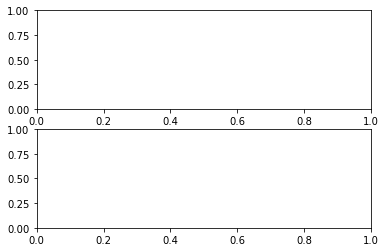

In [121]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

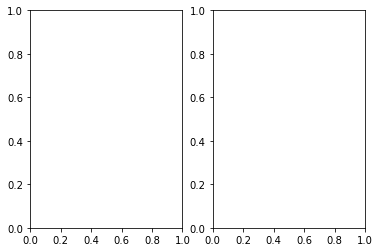

In [122]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.show()

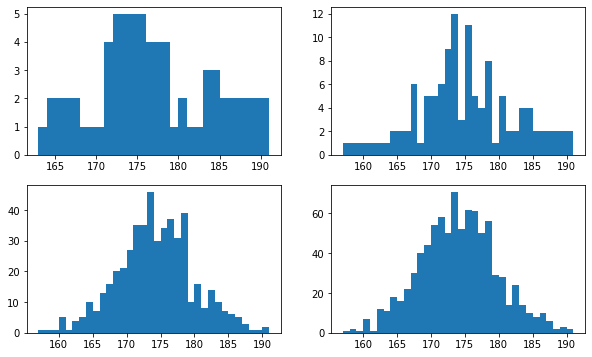

In [128]:
w, h = 10, 6
fig = plt.figure(figsize=(w,h))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

data1 = df.head(50)
data2 = df.head(100)
data3 = df.head(500)
data4 = df

bins1 = list(map(int,set(data1['키'])))
bins2 = list(map(int,set(data2['키'])))
bins3 = list(map(int,set(data3['키'])))
bins4 = list(map(int,set(df['키'])))

ax1.hist(data1['키'], bins = bins1)
ax2.hist(data2['키'], bins = bins2)
ax3.hist(data3['키'], bins = bins3)
ax4.hist(df['키'], bins = bins4)

plt.show()

## 그래프에서 수직선, 수평선 그리고 색칠하기

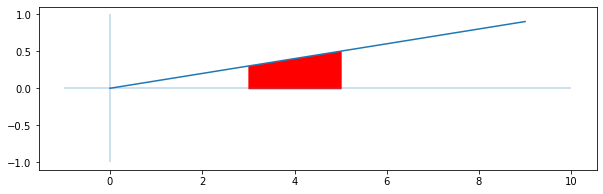

In [154]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)

X = np.arange(0,10,1)
Y = np.linspace(0,0.9,10)

ax.hlines(0,-1,10, alpha=0.3)
ax.vlines(0,-1,1, alpha=0.3)

ax.fill_between(X, Y, where=(X>2)&(X<6), color='red')
ax.plot(X, Y)
plt.show()

## 확률밀도함수

## 예제: 6-7

In [139]:
x_range = np.array([0,4])
x_range

array([0, 4])

- 상태구간

In [138]:
def f(x):
    #if x > x_range[0] and x <= x_range[1]:
    if x_range[0] < x <= x_range[1]:
        return 1/8*x
    else:
        return 0

- 연속확률변수

In [150]:
X = [x_range, f]
X

[array([0, 4]), <function __main__.f(x)>]

- 그래프 그리기

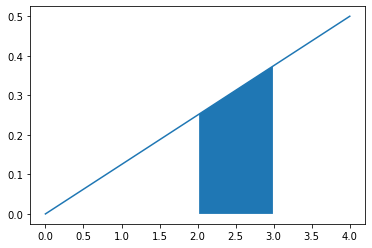

In [145]:
x2 = np.linspace(x_range[0], x_range[1], 100)
y2 = [ f(i) for i in x2 ]

plt.plot(x2, y2)
plt.fill_between(x2, y2, where=(x2>2)&(x2<=3))
plt.show()